In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/Finance_DL/Meta_RNN

/content/drive/MyDrive/Finance_DL/Meta_RNN


In [3]:
#importing libraries

import pandas as pd
import numpy as np

In [4]:
#importing dataset

meta_complete_data = pd.read_csv('META.csv')

In [5]:
meta_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [6]:
meta_training_processed = meta_complete_data[['Open']].values

In [7]:
#scaling features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

meta_training_scaled = scaler.fit_transform(meta_training_processed)

In [8]:
len(meta_training_scaled)

1257

In [9]:
#training features contained data of last 60 days
#training labels contain data of the 1st day

meta_training_features = []
meta_training_labels = []

for i in range(60, len(meta_training_scaled)):
    meta_training_features.append(meta_training_scaled[i - 60:i,0])
    meta_training_labels.append(meta_training_scaled[i,0])

In [10]:
#converting training data to numpy arrays
X_train = np.array(meta_training_features)
y_train = np.array(meta_training_labels)

In [11]:
print(X_train.shape)
print(y_train.shape)

(1197, 60)
(1197,)


In [12]:
#converting data into 3D shape

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [13]:
print(X_train.shape)

(1197, 60, 1)


In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Activation, Dense, Flatten, Dropout, Flatten, LSTM
from tensorflow.keras.models import Model

In [15]:
#defining the LSTM network

input_layer = Input(shape = (X_train.shape[1],1))
lstm1 = LSTM(100, activation = 'relu', return_sequences=True)(input_layer) # usage of 'tanh' instead of 'relu' will remove the warning
do1 = Dropout(0.2)(lstm1)

lstm2 = LSTM(100, activation = 'relu', return_sequences = True)(do1)
do2 = Dropout(0.2)(lstm2)

lstm3 = LSTM(100, activation = 'relu', return_sequences= True)(do2)
do3 = Dropout(0.2)(lstm3)

lstm4 = LSTM(100, activation = 'relu')(do3)
do4 = Dropout(0.2)(lstm4)

output_layer = Dense(1)(do4)

model = Model(input_layer, output_layer)
model.compile(optimizer ='adam', loss = 'mse')

In [16]:
print(X_train.shape)
print(y_train.shape)
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(1197, 60, 1)
(1197,)
(1197, 1)


In [17]:
#training the model

model_history = model.fit(X_train, y_train, epochs = 100, verbose =1, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 25s 454ms/step - loss: 0.0817
Epoch 2/100
38/38 [==============================] - 18s 465ms/step - loss: 0.0090
Epoch 3/100
38/38 [==============================] - 20s 522ms/step - loss: 0.0065
Epoch 4/100
38/38 [==============================] - 17s 457ms/step - loss: 0.0060
Epoch 5/100
38/38 [==============================] - 19s 501ms/step - loss: 0.0062
Epoch 6/100
38/38 [==============================] - 19s 495ms/step - loss: 0.0062
Epoch 7/100
38/38 [==============================] - 17s 458ms/step - loss: 0.0061
Epoch 8/100
38/38 [==============================] - 17s 456ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 19s 497ms/step - loss: 0.0055
Epoch 10/100
38/38 [==============================] - 17s 446ms/step - loss: 0.0056
Epoch 11/100
38/38 [==============================] - 17s 450ms/step - loss: 0.0055
Epoch 12/100
38/38 [==============================] - 18s 477ms/step - loss: 0.0044
E

In [18]:
print(X_train.shape)
print(y_train.shape)

(1197, 60, 1)
(1197, 1)


In [19]:
# creating test set

meta_testing_complete_data = pd.read_csv('META_test.csv')
meta_testing_processed = meta_testing_complete_data[['Open']].values

In [20]:
meta_all_data = pd.concat((meta_complete_data['Open'], meta_testing_complete_data['Open']), axis = 0)

In [21]:
test_inputs = meta_all_data[len(meta_all_data) - len(meta_testing_complete_data) - 60:].values
print(test_inputs.shape)

(80,)


In [22]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(80, 1)


In [23]:
meta_test_features = []
for i in range(60,80):
  meta_test_features.append(test_inputs[i-60:i,0])

In [24]:
X_test = np.array(meta_test_features)
print(X_test.shape)

(20, 60)


In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
print(X_test.shape)

(20, 60, 1)


In [26]:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 506ms/step


In [27]:
print(y_pred.shape)

(20, 1)


In [28]:
print(y_pred)

[[0.89920247]
 [0.8980166 ]
 [0.8979969 ]
 [0.8980297 ]
 [0.907256  ]
 [0.916538  ]
 [0.92737293]
 [0.937672  ]
 [0.9452871 ]
 [0.9520391 ]
 [0.95610154]
 [0.9605727 ]
 [0.96401155]
 [0.9666239 ]
 [0.96887124]
 [0.96858966]
 [0.96816623]
 [0.9445944 ]
 [0.94314027]
 [0.95438886]]


In [29]:
y_hat = scaler.inverse_transform(y_pred)

In [30]:
print(y_hat.shape)

(20, 1)


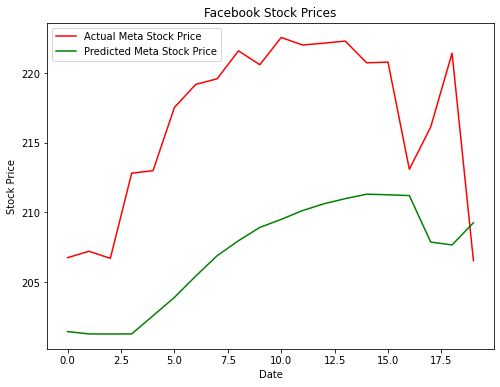

In [31]:
# plotting original and predicted stock values

plt.figure(figsize = (8,6))
plt.plot(meta_testing_processed, color = 'red', label = 'Actual Meta Stock Price')
plt.plot(y_hat, color = 'green', label = 'Predicted Meta Stock Price')
plt.title('Facebook Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()